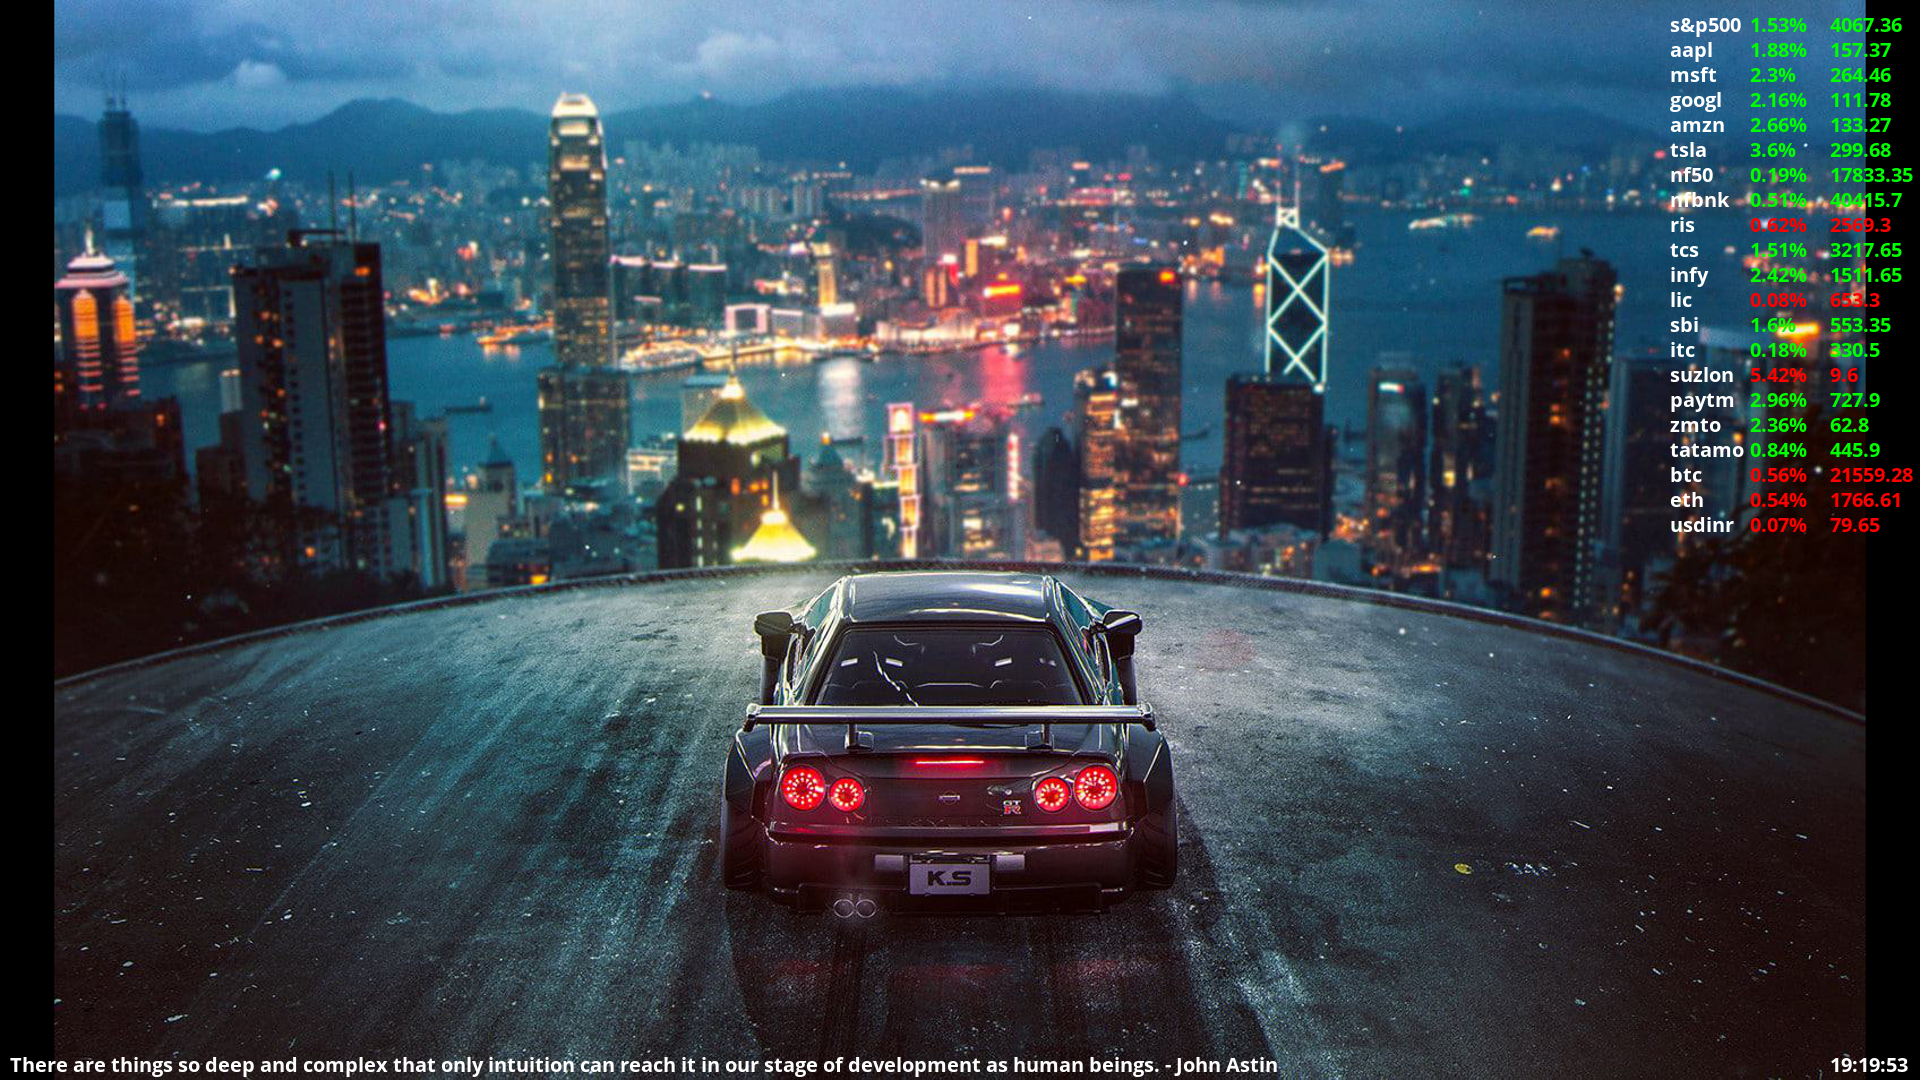

In [1]:
import requests,ctypes,os,numpy as np
from PIL import Image,ImageFont,ImageDraw
import yfinance as yf
from datetime import datetime

enable_time=True
enable_tickers=True
enable_quote=True

now = datetime.now()
current_time = now.strftime("%H:%M:%S")


tickers=[
        ("^GSPC","s&p500"),
        ("aapl","aapl"),
        ("msft","msft"),
        ("goog","googl"),
        ("amzn","amzn"),
        ("tsla","tsla"),
        ("^nsei","nf50"),
        ("^nsebank","nfbnk"),
        ("reliance.ns","ris"),
        ("tcs.ns","tcs"),
        ("infy.ns","infy"),
        ("lici.ns","lic"),
        ("sbin.ns","sbi"),
        ("itc.ns","itc"),
        ("suzlon.ns","suzlon"),
        ("paytm.ns","paytm"),
        ("zomato.ns","zmto"),
        ("TATAMOTORS.NS","tatamo"),
        ("BTC-USD","btc"),
        ("ETH-USD","eth"),
        ("INR=X","usdinr"),
        ]

def add_margin(img,top,left,bottom,right,color):
    width, height = img.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(img.mode, (new_width, new_height),color)
    result.paste(img, (left, top))
    return result
def conv_to_size(path,path_to_save=None):
    z=Image.open(path)
    if z.size[0]/1920>z.size[1]/1080:
        vres=z.size[0]*1080/1920
        vres=vres-z.size[1]
        vres=int(vres/2)
        res=add_margin(z,vres,0,vres,0,(0,0,0))
    else:
        hres=z.size[1]*1920/1080
        hres=hres-z.size[0]
        hres=int(hres/2)
        res=add_margin(z,0,hres,0,hres,(0,0,0))
    if path_to_save is not None:
        res.save(path_to_save)
    else:
        res.save(path)
def ret_change(ticker):
    x= yf.Ticker(ticker)
    z=x.history(period="3d")
    return (((z.iloc[-1]["Close"]-z.iloc[-2]["Close"])/z.iloc[-2]["Close"])*100).round(2),z.iloc[-1]["Close"].round(2)

z=os.listdir("D:/Pictures/slideshow")

#opening random image
path="D:/Pictures/slideshow/"+z[np.random.randint(len(z))]
z=Image.open(path)

if z.size[0]/z.size[1]>1.78 or z.size[0]/z.size[1]<1.76:
    conv_to_size(path)
    z=Image.open(path)
#resizing to correct proportion
z=z.resize((1920,1080))


#start drawing
I1 = ImageDraw.Draw(z)
if enable_quote:     
    try:#write a quote on the image if it is fetched succesfully
        
        myFont = ImageFont.truetype("C:/Users/paras/Data Science/Personal Projects/Automated-Wallpaper-Changer/OpenSans-Bold.ttf",20)
        l="http://api.quotable.io/random"
        r=requests.get(l)
        r=r.json()
        text=r["content"]+" - "+r["author"]
    
        I1.text((10,1050), text, font=myFont, fill =(255, 255, 255))
    except:
        pass
if enable_time:
    try:
        I1.text((1830,1050), current_time, font=myFont, fill =(255, 255, 255))
    except:
        pass
if enable_tickers:
    try:
        ticpos=10
        for i,j in tickers:
            chn,pc=ret_change(i)
            I1.text((1670,ticpos),j, font=myFont, fill =(255,255,255))
            if chn>=0:
                I1.text((1750,ticpos),str(chn)+"%", font=myFont, fill =(0,255,0))
                I1.text((1830,ticpos),str(pc), font=myFont, fill =(0,255,0))
            else:
                I1.text((1750,ticpos),str(abs(chn))+"%", font=myFont, fill =(255,0,0))
                I1.text((1830,ticpos),str(pc), font=myFont, fill =(255,0,0))
                
            ticpos+=25
    except:
        pass

try:#save as jpg
    save_path="D:/Pictures/temp.jpg"
    z.save(save_path,quality="high")
    ctypes.windll.user32.SystemParametersInfoW(20, 0,save_path , 0)
except:#or save as png
    save_path="D:/Pictures/temp.png"
    z.save(save_path,quality="high")
    ctypes.windll.user32.SystemParametersInfoW(20, 0, save_path , 0)
z

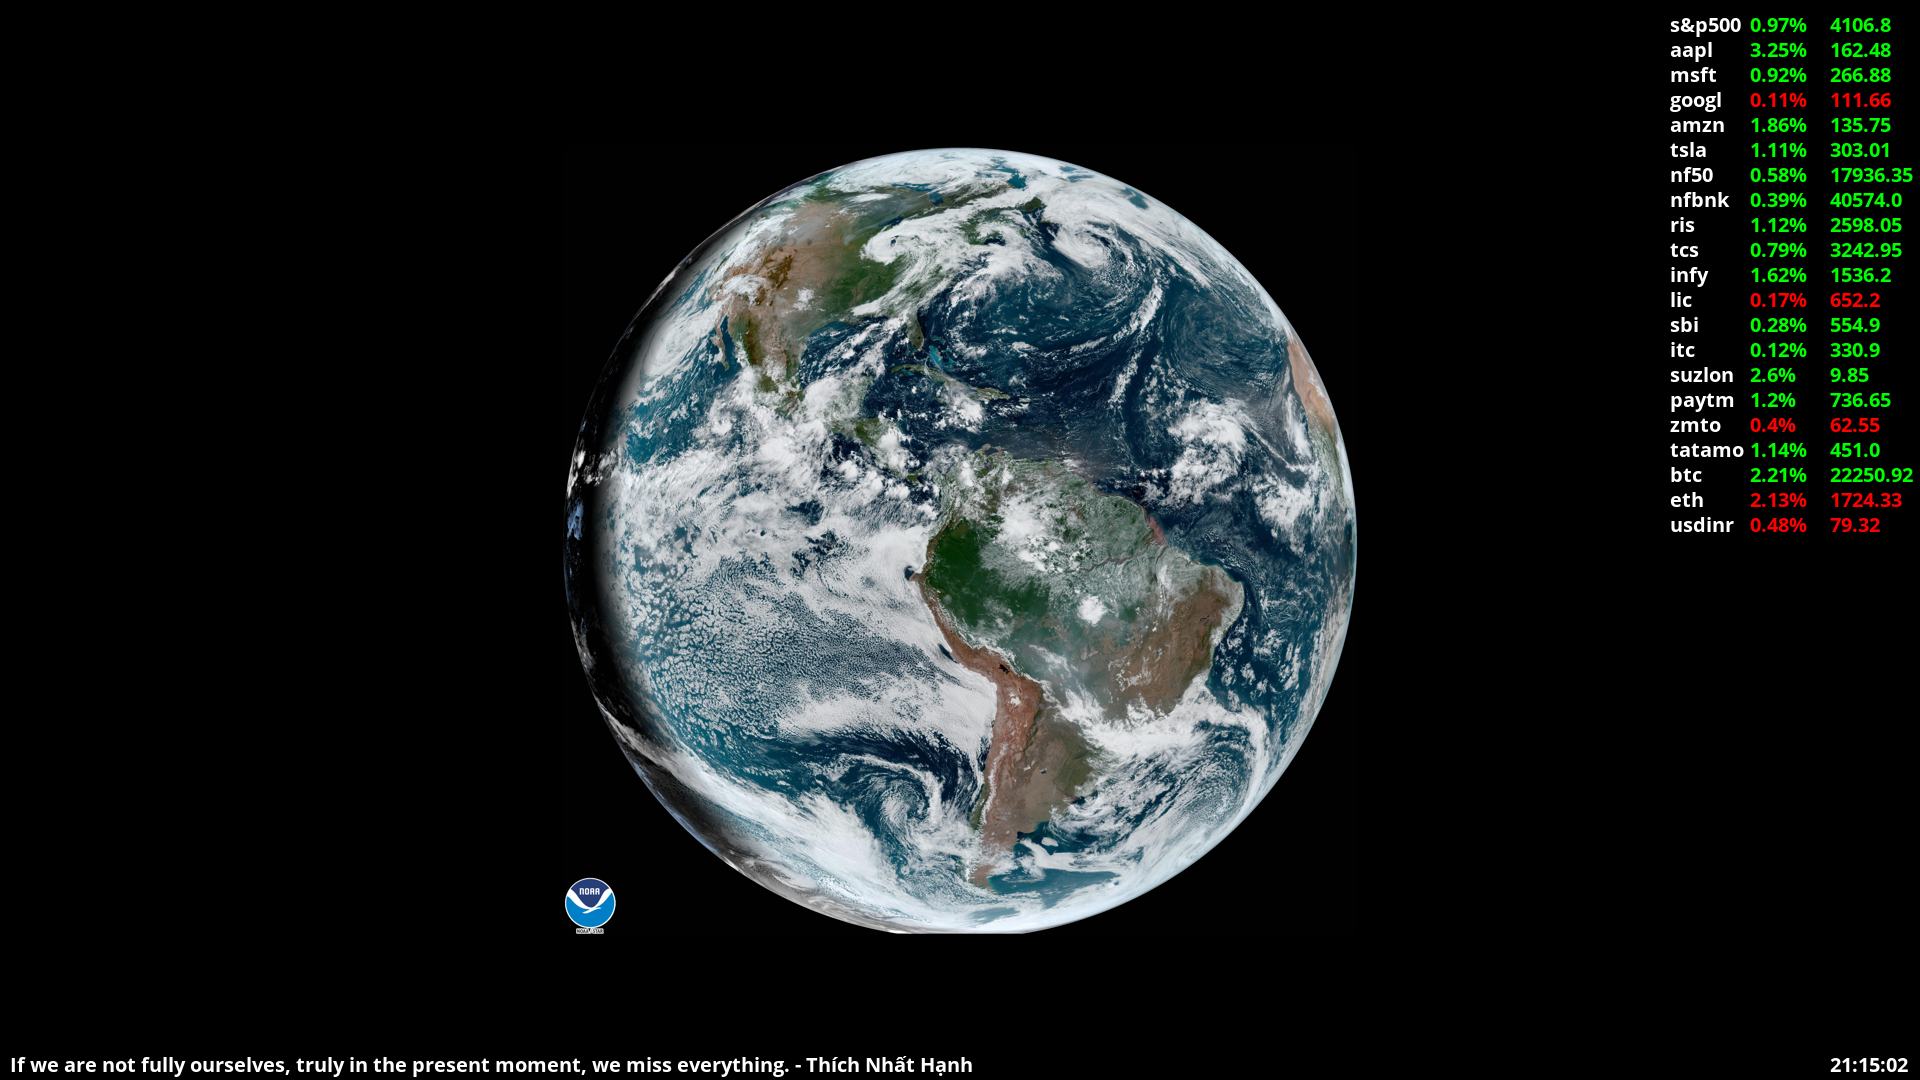

In [1]:
import requests,ctypes,os,numpy as np
from PIL import Image,ImageFont,ImageDraw
import yfinance as yf
from datetime import datetime
from io import BytesIO

if np.random.randint(1)%2==0:
    response = requests.get("https://cdn.star.nesdis.noaa.gov/GOES16/ABI/FD/GEOCOLOR/5424x5424.jpg")
else:
    response = requests.get("https://cdn.star.nesdis.noaa.gov/GOES17/ABI/FD/GEOCOLOR/5424x5424.jpg")
    
img = Image.open(BytesIO(response.content))
img=img.crop((0,0,5424,5382))

pad=1000
hpad=int((4144+(3.55*pad))/2)

enable_time=True
enable_ticker=True
enable_quote=True

now = datetime.now()
current_time = now.strftime("%H:%M:%S")

tickers=[
        ("^GSPC","s&p500"),
        ("aapl","aapl"),
        ("msft","msft"),
        ("goog","googl"),
        ("amzn","amzn"),
        ("tsla","tsla"),
        ("^nsei","nf50"),
        ("^nsebank","nfbnk"),
        ("reliance.ns","ris"),
        ("tcs.ns","tcs"),
        ("infy.ns","infy"),
        ("lici.ns","lic"),
        ("sbin.ns","sbi"),
        ("itc.ns","itc"),
        ("suzlon.ns","suzlon"),
        ("paytm.ns","paytm"),
        ("zomato.ns","zmto"),
        ("TATAMOTORS.NS","tatamo"),
        ("BTC-USD","btc"),
        ("ETH-USD","eth"),
        ("INR=X","usdinr"),
        ]

def add_margin(img,top,left,bottom,right,color):
    width, height = img.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(img.mode, (new_width, new_height),color)
    result.paste(img, (left, top))
    return result

def ret_change(ticker):
    x= yf.Ticker(ticker)
    z=x.history(period="3d")
    return (((z.iloc[-1]["Close"]-z.iloc[-2]["Close"])/z.iloc[-2]["Close"])*100).round(2),z.iloc[-1]["Close"].round(2)

z=add_margin(img,pad,hpad,pad,hpad,(0,0,0))
#resizing to correct proportion
z=z.resize((1920,1080))

#start drawing
I1 = ImageDraw.Draw(z)
if enable_quote:     
    try:#write a quote on the image if it is fetched succesfully
        
        myFont = ImageFont.truetype("C:/Users/paras/Data Science/Personal Projects/Automated-Wallpaper-Changer/OpenSans-Bold.ttf",20)
        l="http://api.quotable.io/random"
        r=requests.get(l)
        r=r.json()
        text=r["content"]+" - "+r["author"]
    
        I1.text((10,1050), text, font=myFont, fill =(255, 255, 255))
    except:
        pass
if enable_time:
    try:
        I1.text((1830,1050), current_time, font=myFont, fill =(255, 255, 255))
    except:
        pass
if enable_ticker:
    try:
        ticpos=10
        for i,j in tickers:
            chn,pc=ret_change(i)
            I1.text((1670,ticpos),j, font=myFont, fill =(255,255,255))
            if chn>=0:
                I1.text((1750,ticpos),str(chn)+"%", font=myFont, fill =(0,255,0))
                I1.text((1830,ticpos),str(pc), font=myFont, fill =(0,255,0))
            else:
                I1.text((1750,ticpos),str(abs(chn))+"%", font=myFont, fill =(255,0,0))
                I1.text((1830,ticpos),str(pc), font=myFont, fill =(255,0,0))
                
            ticpos+=25
    except:
        pass
z
# try:#save as jpg
#     z.save("D:/Pictures/temp.jpg",quality="high")
#     ctypes.windll.user32.SystemParametersInfoW(20, 0, "D:/Pictures/temp.jpg" , 0)
# except:#or save as png
#     z.save("D:/Pictures/temp.png",quality="high")
#     ctypes.windll.user32.SystemParametersInfoW(20, 0, "D:/Pictures/temp.png" , 0)